In [1]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

# Load CSV
df = pd.read_csv("wsb1201_0315.csv")

df



,type,ticker,id,text,score,timestamp,parent_post_id
0,comment_in_dd,TSLA,mhq4a7a,Im starting to feel like some of you aren't ev...,175,2025-03-14 10:32,1jb0bwm
1,comment_in_dd,SPY,mhr49b8,"lowest consumer confidence since 2022, SPY up ...",62,2025-03-14 14:28,1jb0bwm
2,comment_in_dd,TSLA,mhq49tj,I would risk my entire portfolio to see TSLA b...,57,2025-03-14 10:32,1jb0bwm
3,comment_in_dd,TESLA,mhq3hby,We only get market stability when tesla is at ...,50,2025-03-14 10:25,1jb0bwm
4,comment_in_dd,TESLA,mhqbheg,Baltimore gave up Tesla cop cars for FORD,42,2025-03-14 11:33,1jb0bwm
...,...,...,...,...,...,...,...
6254,comment_in_dd,TSLA,m1k2a69,Obviously a lot of people think TSLA is a valu...,8,2024-12-11 17:51,1hbqyji
6255,comment_in_dd,NVDA,m1kcdon,Someone here said Nvda $140 EOD you are a king...,7,2024-12-11 18:40,1hbqyji
6256,comment_in_dd,SPY,m1ii38q,As soon as I sell my long SPY calls,15,2024-12-11 12:19,1hbqyji
6257,comment_in_dd,SPY,m1iknln,TIME TO FULL PORT MY ENTIRE NET WORTH INTO SPY...,9,2024-12-11 12:40,1hbqyji


In [15]:
stock_data = pd.read_csv('../stock_price_related/all_historical_data.csv')
stock_data

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
0,2025-03-14,118.61,121.88,118.15,121.67,121.67,277593500,277593500,3.06,2.580000,120.0775,"March 14, 25",0.025800,NVDA
1,2025-03-13,117.03,117.76,113.79,115.58,115.58,299033131,299033131,-1.45,-1.240000,116.0400,"March 13, 25",-0.012400,NVDA
2,2025-03-12,114.12,116.76,112.88,115.74,115.74,323857500,323857500,1.62,1.420000,114.8750,"March 12, 25",0.014200,NVDA
3,2025-03-11,106.99,112.24,104.77,108.76,108.75,354865700,354865700,1.77,1.650000,108.1900,"March 11, 25",0.016500,NVDA
4,2025-03-10,109.90,111.85,105.46,106.98,106.97,366487400,366487400,-2.92,-2.660000,108.5475,"March 10, 25",-0.026600,NVDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2024-12-17,604.19,605.17,602.89,604.29,600.46,55773545,55773545,0.10,0.016551,604.1350,"December 17, 24",0.000166,SPY
185,2024-12-16,606.00,607.78,605.21,606.79,602.94,43695200,43695200,0.79,0.130360,606.4450,"December 16, 24",0.001304,SPY
186,2024-12-13,606.40,607.13,602.81,604.21,600.38,35904730,35904730,-2.19,-0.361150,605.1375,"December 13, 24",-0.003612,SPY
187,2024-12-12,606.58,607.16,604.33,604.33,600.50,31543812,31543812,-2.25,-0.370930,605.6000,"December 12, 24",-0.003709,SPY


In [38]:
# Install necessary packages if not installed
!pip install pandas numpy matplotlib transformers torch scipy 

import pandas as pd
import numpy as np
import torch
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Sentiment Scoring Function
def get_sentiment_score(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    score = outputs.logits.squeeze().item()  # Continuous score between 0 (negative) and 1 (positive)
    return score
# Load Stock Data
stock_data = pd.read_csv('../stock_price_related/all_historical_data.csv', parse_dates=['date'])
stock_data.sort_values('date', inplace=True)
stock_data.set_index('date', inplace=True)

# Calculate Volatility
def compute_volatility(df):
    ht = np.log(df['high'] / df['open'])
    lt = np.log(df['low'] / df['open'])
    ct = np.log(df['close'] / df['open'])
    Jt = np.log(df['open'] / df['close'].shift(1)) ** 2

    Pt = (ht - lt)**2 / (4 * np.log(2))
    Gt = 0.511 * (ht - lt)**2 - 0.383 * ct**2 - 0.019 * ct * (ht + lt - 2 * ht * lt)
    Rt = ht * (ht - ct) - lt * (lt - ct)

    volatility = np.log(100**2 * 252 * (1/3) * (Pt + Gt + Rt) + Jt)
    return volatility

stock_data['volatility'] = compute_volatility(stock_data)

# Load Reddit Data
reddit_data = pd.read_csv('wsb1201_0315.csv', parse_dates=['timestamp'])
reddit_data = reddit_data.dropna(subset=['text'])

# FinBERT Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained("LHF/finbert-regressor")
model = AutoModelForSequenceClassification.from_pretrained("LHF/finbert-regressor")

model.to(device)
model.eval()


# Apply Sentiment Scoring
reddit_data['sentiment_Score'] = reddit_data['text'].apply(lambda x: get_sentiment_score(x))

# Aggregate Sentiment Daily
reddit_data['date'] = reddit_data['timestamp'].dt.date



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [24]:
stock_data

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol,volatility
date,,,,,,,,,,,,,,
2024-12-11,605.78,608.43,605.50,607.46,603.61,28677723,28677723,1.68,0.27733,606.7925,"December 11, 24",0.002773,SPY,NaN
2024-12-11,137.36,140.17,135.21,139.31,139.30,184905200,184905200,1.95,1.42000,138.0125,"December 11, 24",0.014200,NVDA,6.390754
2024-12-11,409.70,424.88,402.38,424.77,424.77,104287600,104287600,15.07,3.68000,415.4325,"December 11, 24",0.036800,TSLA,6.830380
2024-12-12,424.84,429.30,415.00,418.10,418.10,87752225,87752225,-6.74,-1.59000,421.8100,"December 12, 24",-0.015900,TSLA,6.733732
2024-12-12,137.08,138.44,135.80,137.34,137.33,159211400,159211400,0.26,0.18967,137.1650,"December 12, 24",0.001897,NVDA,5.516629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-13,117.03,117.76,113.79,115.58,115.58,299033131,299033131,-1.45,-1.24000,116.0400,"March 13, 25",-0.012400,NVDA,6.285756
2025-03-13,558.49,559.11,549.68,551.42,549.77,74079414,74079414,-7.07,-1.27000,554.6750,"March 13, 25",-0.012700,SPY,4.866106
2025-03-14,556.11,563.83,551.49,562.81,561.12,62660321,62660321,6.70,1.20000,558.5600,"March 14, 25",0.012000,SPY,5.246589


In [25]:
daily_sentiment

date
2024-12-10         NaN
2024-12-11    0.316034
2024-12-12    0.363214
2024-12-13    0.388824
2024-12-16    0.372952
                ...   
2025-03-10    0.355239
2025-03-11    0.393333
2025-03-12    0.386899
2025-03-13    0.362236
2025-03-14    0.362648
Name: sentiment_Score, Length: 69, dtype: float64

In [37]:
reddit_data

,type,ticker,id,text,score,timestamp,parent_post_id,date
0,comment_in_dd,TSLA,mhq4a7a,Im starting to feel like some of you aren't ev...,175,2025-03-14 10:32:00,1jb0bwm,2025-03-14
1,comment_in_dd,SPY,mhr49b8,"lowest consumer confidence since 2022, SPY up ...",62,2025-03-14 14:28:00,1jb0bwm,2025-03-14
2,comment_in_dd,TSLA,mhq49tj,I would risk my entire portfolio to see TSLA b...,57,2025-03-14 10:32:00,1jb0bwm,2025-03-14
3,comment_in_dd,TESLA,mhq3hby,We only get market stability when tesla is at ...,50,2025-03-14 10:25:00,1jb0bwm,2025-03-14
4,comment_in_dd,TESLA,mhqbheg,Baltimore gave up Tesla cop cars for FORD,42,2025-03-14 11:33:00,1jb0bwm,2025-03-14
...,...,...,...,...,...,...,...,...
6254,comment_in_dd,TSLA,m1k2a69,Obviously a lot of people think TSLA is a valu...,8,2024-12-11 17:51:00,1hbqyji,2024-12-11
6255,comment_in_dd,NVDA,m1kcdon,Someone here said Nvda $140 EOD you are a king...,7,2024-12-11 18:40:00,1hbqyji,2024-12-11
6256,comment_in_dd,SPY,m1ii38q,As soon as I sell my long SPY calls,15,2024-12-11 12:19:00,1hbqyji,2024-12-11
6257,comment_in_dd,SPY,m1iknln,TIME TO FULL PORT MY ENTIRE NET WORTH INTO SPY...,9,2024-12-11 12:40:00,1hbqyji,2024-12-11


            volatility  sentiment
2024-12-11    6.610567   0.316034
2024-12-12    5.034316   0.363214
2024-12-13    5.721432   0.388824
2024-12-16    5.227295   0.372952
2024-12-17    5.212826   0.371999


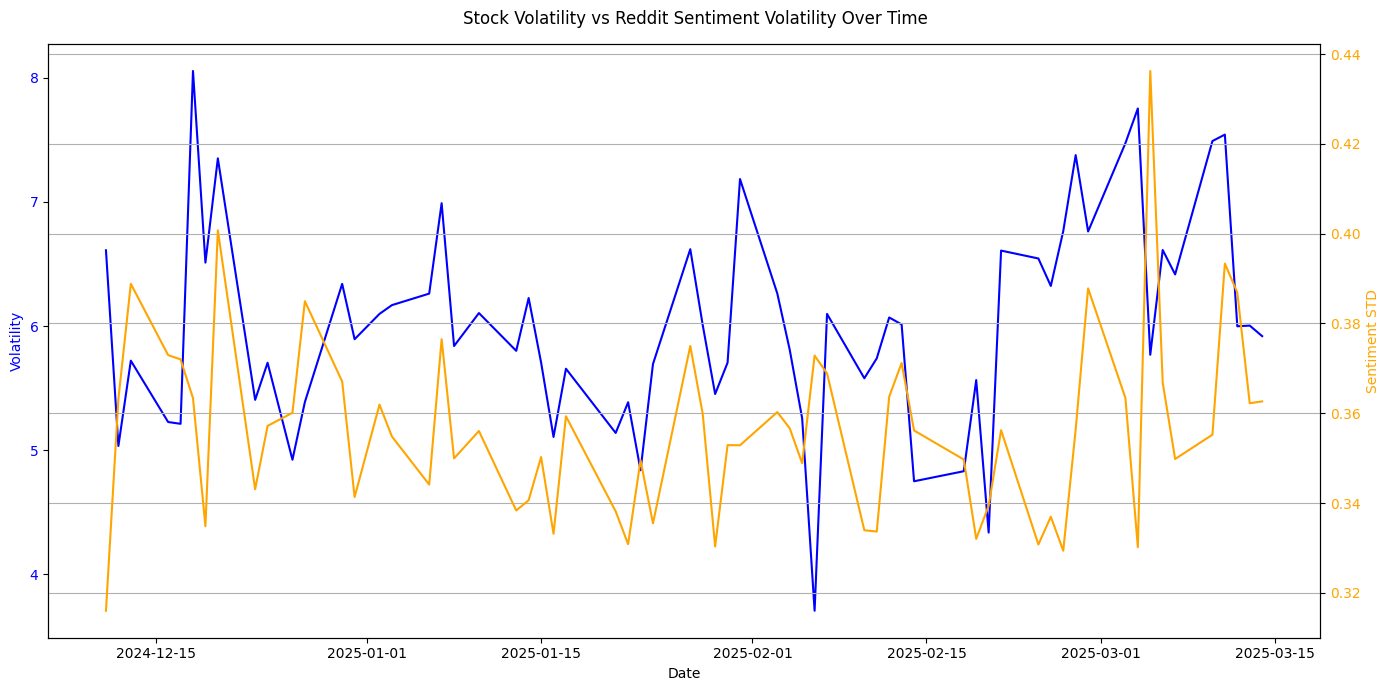

In [39]:
# --- 1. Stock Data: Force daily, only volatility column ---
stock_data = stock_data.copy()
stock_data.index = pd.to_datetime(stock_data.index).date  # drop time
stock_volatility_daily = stock_data[['volatility']].groupby(stock_data.index).mean()

# --- 2. Reddit Data: Group by date and std on sentiment only ---
reddit_data['date'] = pd.to_datetime(reddit_data['timestamp']).dt.date  # if not already
daily_sentiment_std = reddit_data.groupby('date')['sentiment_Score'].std()
daily_sentiment_std = daily_sentiment_std.fillna(0)  # in case only one comment that day

# --- 3. Merge ---
merged = pd.merge(
    stock_volatility_daily,
    daily_sentiment_std.rename('sentiment'),
    left_index=True,
    right_index=True,
    how='inner'
)

print(merged.head())

# --- 4. Plot ---
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(merged.index, merged['volatility'], color='blue', label='Stock Volatility')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged.index, merged['sentiment'], color='orange', label='Reddit Sentiment Volatility')
ax2.set_ylabel('Sentiment STD', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Stock Volatility vs Reddit Sentiment Volatility Over Time')
fig.tight_layout()
plt.grid()
plt.show()


In [42]:
merged

,volatility,sentiment
2024-12-11,6.610567,0.316034
2024-12-12,5.034316,0.363214
2024-12-13,5.721432,0.388824
2024-12-16,5.227295,0.372952
2024-12-17,5.212826,0.371999
...,...,...
2025-03-10,7.490455,0.355239
2025-03-11,7.542262,0.393333
2025-03-12,5.998304,0.386899
2025-03-13,6.003978,0.362236


In [41]:
!pip install scipy
import scipy.stats as stats
# --- Correlation Computation ---
pearson_corr = merged['volatility'].corr(merged['sentiment'], method='pearson')
spearman_corr = merged['volatility'].corr(merged['sentiment'], method='spearman')

print(f"Pearson correlation between Stock Volatility and Reddit Sentiment Volatility: {pearson_corr:.4f}")
print(f"Spearman correlation between Stock Volatility and Reddit Sentiment Volatility: {spearman_corr:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 15.6 MB/s eta 0:00:00a 0:00:01
Pearson correlation between Stock Volatility and Reddit Sentiment Volatility: 0.1086
Spearman correlation between Stock Volatility and Reddit Sentiment Volatility: 0.1411
